# Big data group project: Functional map of the world
### Motivation: What is the relationship between countries' abundance of recreational and fitness locations to their average Body Mass Index (BMI)

In [1]:
import pandas as pd
import ast
import numpy as np
import matplotlib.pyplot as plt

trainval = pd.read_csv("groundtruthdata.csv")
categorical_items = []
for img in trainval[['bounding_boxes']].values:
    correct_list = ast.literal_eval(img[0])
    categorical_items.append(correct_list[0]['raw_category'])

# Add New Row
trainval['category'] = pd.Series(categorical_items)


In [2]:
country_df = trainval[['country_code', 'category']].copy()

In [3]:
#list of locations considered to be recreational
recreational = ["Golf Course", "Basketball Court", "Track and Field", "Soccer", 
                "Tennis Court", "Baseball Field", "American Football", "Swimming Pool"]

rec_df = country_df[country_df['category'].isin(recreational)]

In [4]:
#create a dataframe for countries frequency of recreational locations
rec_count = rec_df['country_code'].value_counts()
rec_count_df = pd.DataFrame(rec_count)
rec_count_df.reset_index(inplace=True)
rec_count_df = rec_count_df.rename(columns={'country_code':'recreational', 'index':'country_code'})
rec_count_df.head()

,country_code,recreational
0,USA,23496
1,BRA,4286
2,FRA,3657
3,JPN,2600
4,AUS,1891


In [5]:
#country_codes maps country names to their country codes
country_codes = pd.read_csv('country_codes_2020.csv')
# Country population an area information
country_populations = pd.read_csv('countries_by_population_2019.csv')
# Merging previous two dataframes
country_df = country_codes.merge(country_populations, on='name', how='inner')
country_df = country_df.rename(columns={'cca3':'country_code'})
country_df.head()

,name,cca2,country_code,ccn3,bmi,Rank,pop2019,pop2018,GrowthRate,area,Density
0,Afghanistan,AF,AFG,4,4.5,37,38041.754,NaN,1.0233,652230.0,58.3257
1,Albania,AL,ALB,8,22.3,140,2880.917,NaN,0.9989,28748.0,100.2128
2,Algeria,DZ,DZA,12,26.6,34,43053.054,NaN,1.0185,2381741.0,18.0763
3,American Samoa,AS,ASM,16,NaN,209,55.312,NaN,0.9978,199.0,277.9497
4,Andorra,AD,AND,20,28.0,202,77.142,NaN,1.0016,468.0,164.8333


In [6]:
country_df = country_df.merge(rec_count_df, on='country_code', how='inner')

In [7]:
#Minimum bmi to be considered "obese" is 30
country_df = country_df.drop(country_df[country_df.bmi < 30].index)

#To make the distribution even for smaller countries, 
#we consider the density of recreational locations by calculating recreational_per_area
country_df['recreational_per_area'] = country_df.apply(lambda row: (row.recreational/row.area), axis = 1)
country_df.head()

,name,cca2,country_code,ccn3,bmi,Rank,pop2019,pop2018,GrowthRate,area,Density,recreational,recreational_per_area
5,Aruba,AW,ABW,533,NaN,196,106.314,NaN,1.0043,180.0,590.6333,13,0.072222
6,Australia,AU,AUS,36,30.4,55,25203.198,NaN,1.0118,7692024.0,3.2765,1891,0.000246
8,Bahamas,BS,BHS,44,32.1,178,389.482,NaN,1.0097,13943.0,27.9339,10,0.000717
15,Bermuda,BM,BMU,60,NaN,205,62.506,NaN,0.9964,54.0,1157.5185,3,0.055556
20,Brunei,BN,BRN,96,NaN,175,433.285,NaN,1.0097,5765.0,75.1578,2,0.000347


<AxesSubplot:xlabel='recreational_per_area'>

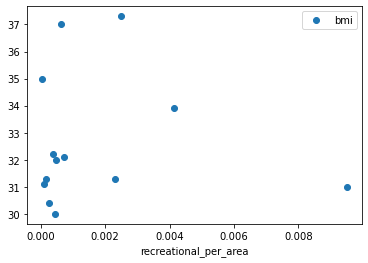

In [8]:
country_df.plot(x="recreational_per_area", y = "bmi", style = 'o' )

In [9]:
corr_coefficient = country_df["recreational_per_area"].corr(country_df["bmi"])

### Conclusion

In [10]:
f"The slightly negative correlation between recreational locations\
per square area in a country to their average BMI of {corr_coefficient} \
suggests that the more recreational locations available, the lower the average BMI.\
Possibly, people use these facilities when in abundance and maintain a relatively lower BMI."

'The slightly negative correlation between recreational locationsper square area in a country to their average BMI of -0.0309449360611722 suggests that the more recreational locations available, the lower the average BMI.Possibly, people use these facilities when in abundance and maintain a relatively lower BMI.'